<a href="https://colab.research.google.com/github/rddelarosa/DSC1107/blob/main/LAB_FA_1_DSC1107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the necessary packages (only needs to be done once per session)
install.packages("tidyverse")
install.packages("nycflights13")

# Load the libraries
library(tidyverse)
library(nycflights13)
library(ggplot2)

# Load the dataset
data(flights)
print("Setup Complete. Data Loaded.")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Setup Complete. Data Loaded."


**Part A.** Data Understanding & Preparation (10 points)

**Task A1.** Dataset Overview (4 points)
Display the structure and dimensions of the dataset.

Identify:
- Number of observations
- Number of variables
- Types of variables (numeric, categorical)

📌 Guide: str(), dim(), glimpse()

**Task A2.** Data Cleaning (6 points)
Identify missing values in:
- dep_delay
- arr_delay

Create a cleaned dataset by removing rows with missing departure or arrival delays.

📌 Guide: is.na(), filter(), na.omit()




In [ ]:
# A1: Dataset Overview
cat("\nDimensions Overview")
cat("Number of Rows:", nrow(flights), "\n")
cat("Number of Columns:", ncol(flights), "\n")

cat("\nVariable Structure \n")
glimpse(flights)

# A2: Data Cleaning
# Count missing values before cleaning
missing_dep <- sum(is.na(flights$dep_delay))
missing_arr <- sum(is.na(flights$arr_delay))
cat("\nMissing Departure Delays:", missing_dep, "\n")
cat("Missing Arrival Delays:", missing_arr, "\n")

# Create cleaned dataset (removing NAs in dep_delay and arr_delay)
flights_clean <- flights %>%
filter(!is.na(dep_delay), !is.na(arr_delay))

# Verify cleaning
cat("\nDimensions After Cleaning\n")
cat("Number of Rows:", nrow(flights_clean), "\n")
cat("Number of Columns:", ncol(flights_clean), "\n")



Dimensions OverviewNumber of Rows: 336776 
Number of Columns: 19 

Variable Structure 
Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tail

**Part B.** Data Visualization (12 points)

**Task B1.** Distribution of Departure Delays (4 points)
- Create a histogram showing the distribution of dep_delay.
- Add appropriate title and axis labels.

📌 Guide: ggplot(), geom_histogram()

**Task B2.** Flight Delays by Airline (4 points)
- Create a boxplot of departure delay by airline (carrier).
- Interpret which airline shows the greatest variability in delays.

📌 Guide: geom_boxplot()

**Task B3.** Relationship Between Distance and Arrival Delay (4 points)
- Create a scatter plot of:
  - distance vs arr_delay
- Use transparency to handle overplotting.

📌 Guide: geom_point(alpha = …)



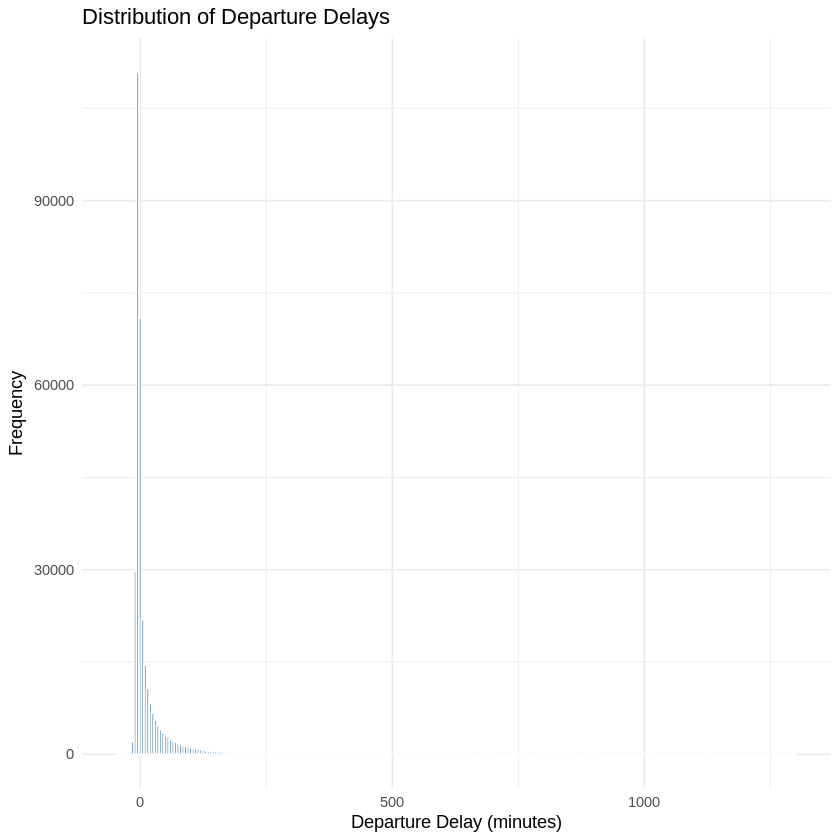

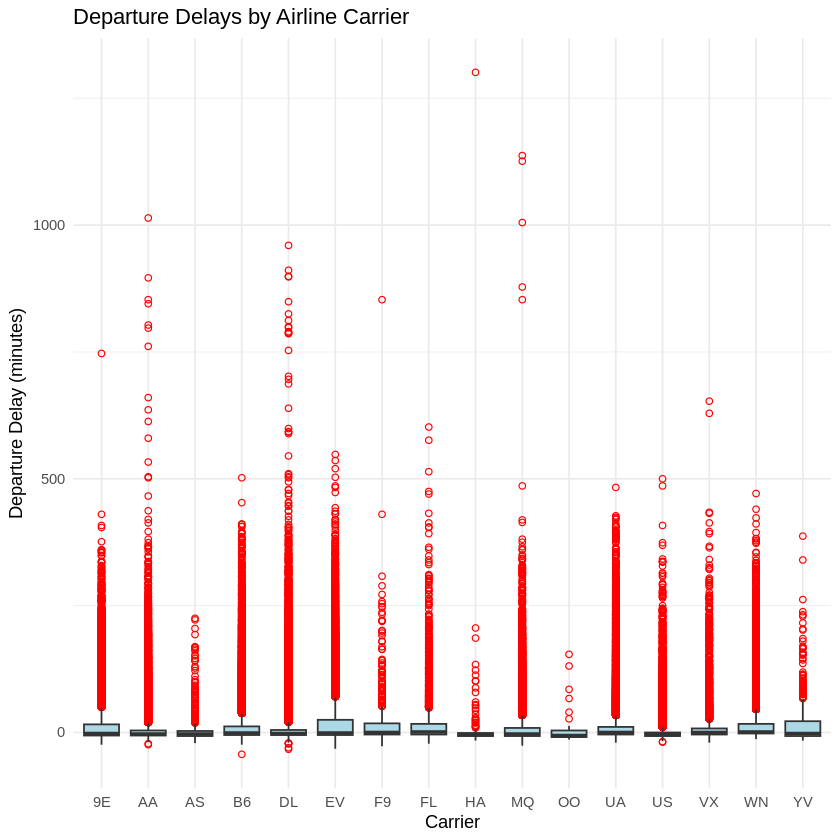

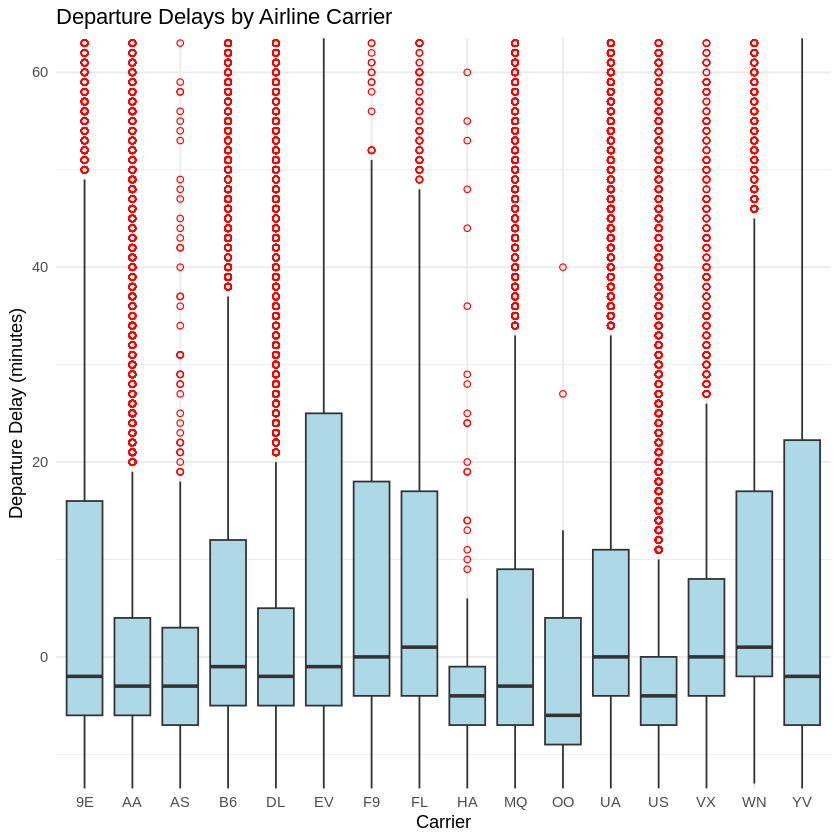

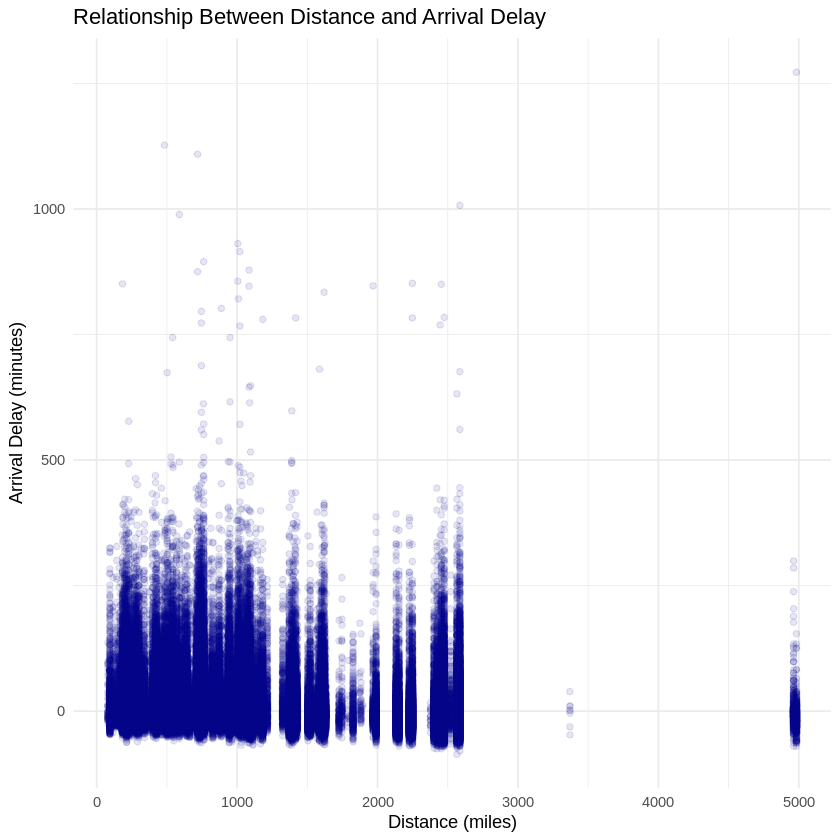

In [ ]:
# B1: Histogram of Departure Delays
plot1 <- ggplot(data = flights_clean, aes(x = dep_delay)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "white") +
  labs(
    title = "Distribution of Departure Delays",
    x = "Departure Delay (minutes)",
    y = "Frequency"
  ) +
  theme_minimal()

print(plot1)

# B2: Boxplot of Delays by Airline
plot2 <- ggplot(data = flights_clean, aes(x = carrier, y = dep_delay)) +
  geom_boxplot(fill = "lightblue", outlier.colour = "red", outlier.shape = 1) +
  labs(
    title = "Departure Delays by Airline Carrier",
    x = "Carrier",
    y = "Departure Delay (minutes)"
  ) +
  theme_minimal()

# B2: Boxplot of Delays by Airline but zoom in
print(plot2)
plot2 <- ggplot(data = flights_clean, aes(x = carrier, y = dep_delay)) +
  coord_cartesian(ylim = c(-10, 60)) +
  geom_boxplot(fill = "lightblue", outlier.colour = "red", outlier.shape = 1) +
  labs(
    title = "Departure Delays by Airline Carrier",
    x = "Carrier",
    y = "Departure Delay (minutes)"
  ) +
  theme_minimal()

print(plot2)

# B3: Scatter Plot (Distance vs Arrival Delay)
plot3 <- ggplot(data = flights_clean, aes(x = distance, y = arr_delay)) +
  geom_point(alpha = 0.1, color = "darkblue") + # alpha = 0.1 handles overplotting
  labs(
    title = "Relationship Between Distance and Arrival Delay",
    x = "Distance (miles)",
    y = "Arrival Delay (minutes)"
  ) +
  theme_minimal()

print(plot3)

Based on the boxplot, the carrier EV (ExpressJet) appears to show the greatest variability in delays. This is indicated by it having the 'tallest' box (largest Interquartile Range), which suggests that the middle 50% of its flights experience a much wider and more unpredictable range of delay times.


**Part C.** Interpretation & Insights (8 points)

**Task C1.** Summary Statistics (4 points)
- Compute the mean and median of:
  - dep_delay
  - arr_delay

- Briefly explain why the mean and median may differ.

📌 Guide: mean(), median()

**Task C2.** Insight Question (4 points)
Answer in 3–5 sentences:

Based on your analysis and visualizations, what factors appear to be associated with flight delays? Support your answer using at least one plot.



In [ ]:
# C1: Summary Statistics
summary_stats <- flights_clean %>%
  summarise(
    mean_dep_delay = mean(dep_delay),
    median_dep_delay = median(dep_delay),
    mean_arr_delay = mean(arr_delay),
    median_arr_delay = median(arr_delay)
  )

# Print in a clean "Label: Answer" format
cat("Departure Statistics\n")
cat("Mean Departure Delay:  ", summary_stats$mean_dep_delay, "\n")
cat("Median Departure Delay:", summary_stats$median_dep_delay, "\n")

cat("\nArrival Statistics \n")
cat("Mean Arrival Delay:    ", summary_stats$mean_arr_delay, "\n")
cat("Median Arrival Delay:  ", summary_stats$median_arr_delay, "\n")

# Explanation logic for your write-up:
# If Mean > Median, the data is Right-Skewed (long tail of delays).

Departure Statistics
Mean Departure Delay:   12.55516 
Median Departure Delay: -2 

Arrival Statistics 
Mean Arrival Delay:     6.895377 
Median Arrival Delay:   -5 


Based on the visualizations, Carrier appears to be a strong factor associated with flight delays. In B2, the boxplot shows that some airlines have significantly higher variability and median delays than others. Additionally, the summary statistics in C1 reveal that the mean delay is higher than the median, indicating a right-skewed distribution where a few extreme outliers (massive delays) pull the average up, even though most flights are relatively on time.